In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\HP\Downloads\python learning\capstone.csv")

# Display the first few rows of the dataset
df.head()




,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


### Feature Importance

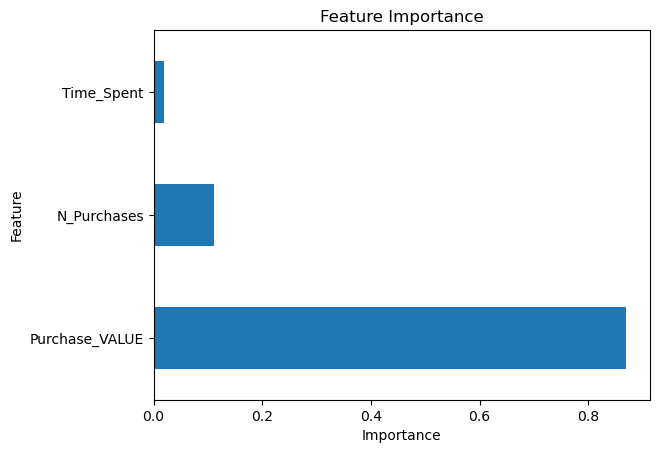

In [5]:
import matplotlib.pyplot as plt

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()


In [2]:
# Define the feature variables and the target variable
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler



X = df[['N_Purchases', 'Purchase_VALUE', 'Time_Spent']]
y = df['Revenue_Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r_squared}')

MAPE: 0.6870171695054406
MSE: 108.27080694859202
RMSE: 10.405325893435151
MAE: 7.66770963392785
R-squared: 0.5179010435946187


In [20]:
import pandas as pd
predictions_df = pd.DataFrame({
    'Actual Sales': y_test,  
    'Predicted Sales': y_pred
})

predictions_df


,Actual Sales,Predicted Sales
44712,31.0,35.964907
43557,30.1,31.921800
13540,44.3,19.780442
15253,22.5,32.577143
42221,0.7,0.700000
...,...,...
15269,39.7,38.090768
11299,25.3,35.171784
32364,2.0,3.835854
18432,20.2,16.721662


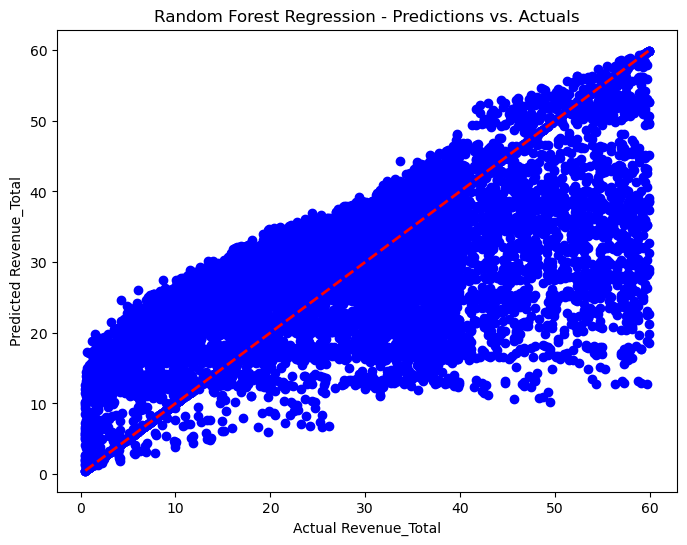

In [7]:
# Plot predictions vs. actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Revenue_Total')
plt.ylabel('Predicted Revenue_Total')
plt.title('Random Forest Regression - Predictions vs. Actuals')
plt.show()


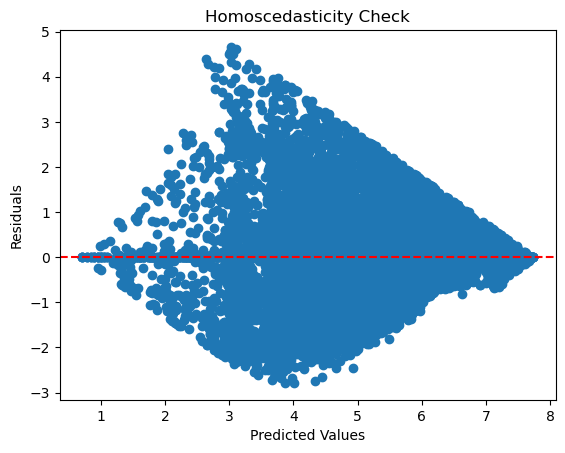

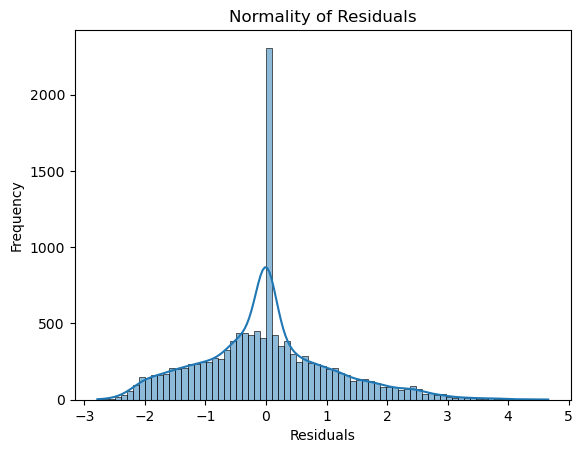

In [26]:
import seaborn as sns


# Residuals plot for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Residuals histogram for normality
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality of Residuals")
plt.show()




### Square Root Transformation

In [3]:
# Define the feature variables and the target variable
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler



X = df[['N_Purchases', 'Purchase_VALUE', 'Time_Spent']]
y = np.sqrt(df['Revenue_Total'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'MAPE: {mape}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r_squared}')

MAPE: 0.22220370156296576
MSE: 1.215918445077004
RMSE: 1.10268692069735
MAE: 0.8024386901135909
R-squared: 0.5403625387208224


In [25]:
import pandas as pd
predictions_df = pd.DataFrame({
    'Actual Sales': y_test**2,  
    'Predicted Sales': y_pred**2
})

predictions_df


,Actual Sales,Predicted Sales
44712,31.0,35.653977
43557,30.1,30.784073
13540,44.3,18.027441
15253,22.5,31.876728
42221,0.7,0.698962
...,...,...
15269,39.7,37.768894
11299,25.3,34.661059
32364,2.0,3.243574
18432,20.2,13.307835


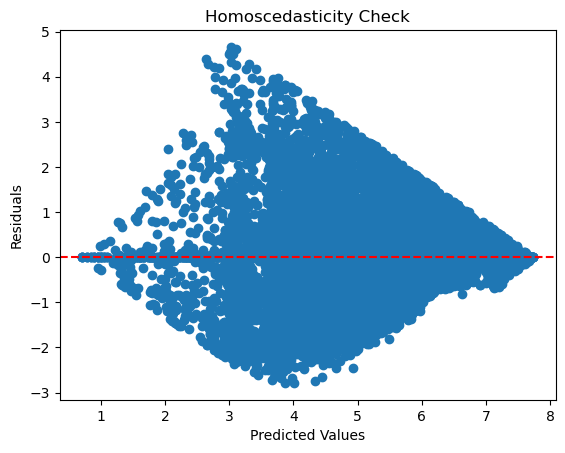

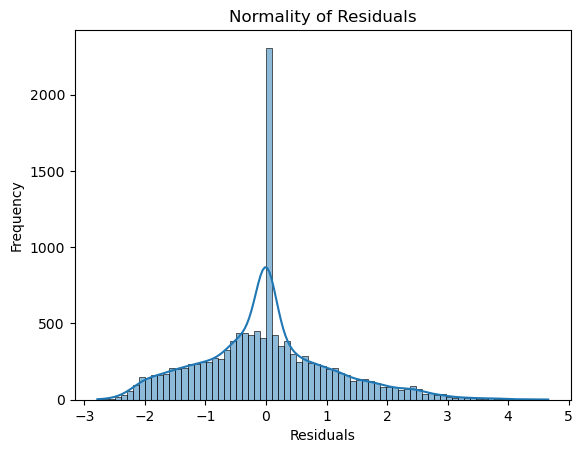

In [29]:
import seaborn as sns


# Residuals plot for homoscedasticity
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Residuals histogram for normality
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality of Residuals")
plt.show()




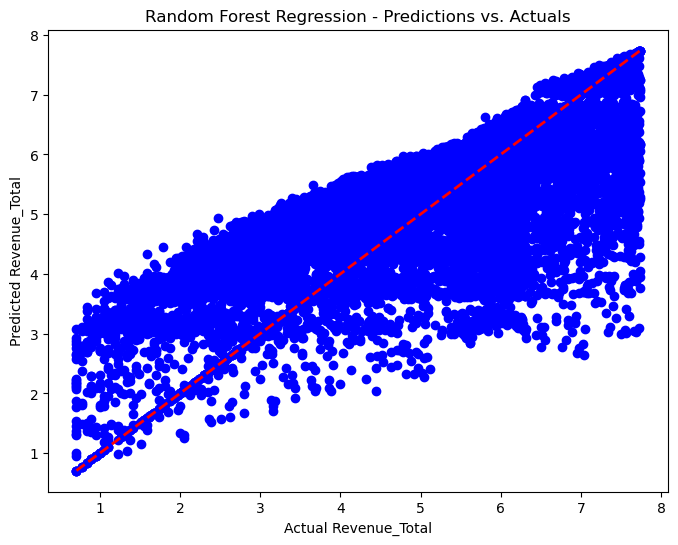

In [17]:
# Plot predictions vs. actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Revenue_Total')
plt.ylabel('Predicted Revenue_Total')
plt.title('Random Forest Regression - Predictions vs. Actuals')
plt.show()
